# Price to Trailing 12-Month Sales

[Reference](https://www.quantopian.com/lectures/case-study-traditional-value-factor)

This is calculated as a simple ratio between price per share and trailing 12-month (TTM) sales. 

TTM is a transformation rather than a metric and effectively calculates improvement or deterioration of a fundamental value from a particular quarter one year previously. For example, if one wanted to calculate today's TTM Sales for company XYZ, one would take the most recent quarter's revenue and divide it by the difference between this quarter's revenue and this quarter's revenue last year added to the revenue as given by the company's most recent fiscal year-end filing.

To calculate the exact TTM of a security is indeed possible using Pipeline; however, the code required is slow. Luckily, this value can be well approximated by the built-in Morningstar valuation ratios, which use annual sales to calculate the Price to Sales fundamental value. This slight change boosts the code's speed enormously yet has very little impact on the results of the strategy itself.

Price to TTM Sales is similar to the P/B Ratio in terms of function. The major difference in these two ratios is the fact that inclusion of TTM means that seasonal fluctuations are minimized, as previous data is used to smooth the value. In our case, annualized values accomplish this same smoothing.

Also, note that the values produced are negative; this factor requires the same inversion as the P/B Ratio.

In [2]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import CustomFactor
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.filters.morningstar import Q1500US

In [3]:
class Price_to_TTM_Sales(CustomFactor):
    inputs = [morningstar.valuation_ratios.ps_ratio]
    window_length = 1
    
    def compute(self, today, assets, out, ps):
        out[:] = -ps[-1]
        
# Custom Factor 1 : Dividend Yield
class Div_Yield(CustomFactor):

    inputs = [morningstar.valuation_ratios.dividend_yield]
    window_length = 1

    def compute(self, today, assets, out, d_y):
        out[:] = d_y[-1]

def make_pipeline():
    
    pipe = Pipeline(
        columns={
            'Price_to_TTM_Sales': Price_to_TTM_Sales(),
        },
        screen=Q1500US()

    )

    return pipe

In [4]:
result = run_pipeline(make_pipeline(), start_date='2013-12-01', end_date='2014-12-01')

In [5]:
result.head()

Price_to_TTM_Sales
2013-12-02 00:00:00+00:00 Equity(2 [ARNC])              -0.4469
                          Equity(24 [AAPL])             -3.0312
                          Equity(41 [ARCB])             -0.3701
                          Equity(62 [ABT])              -1.5017
                          Equity(67 [ADSK])             -4.5290

In [6]:
result.columns

Index([u'Price_to_TTM_Sales'], dtype='object')

In [7]:
result.mean(level=0)

,Price_to_TTM_Sales
2013-12-02 00:00:00+00:00,-12.542986
2013-12-03 00:00:00+00:00,-12.542986
2013-12-04 00:00:00+00:00,-12.542986
2013-12-05 00:00:00+00:00,-12.549344
2013-12-06 00:00:00+00:00,-12.551160
2013-12-09 00:00:00+00:00,-12.558291
2013-12-10 00:00:00+00:00,-12.558291
2013-12-11 00:00:00+00:00,-12.558291
2013-12-12 00:00:00+00:00,-12.558291
2013-12-13 00:00:00+00:00,-12.558291


In [10]:
tmp = result.copy()

In [11]:
tmp = tmp.reset_index()
tmp.head()

,level_0,level_1,Price_to_TTM_Sales
0,2013-12-02 00:00:00+00:00,Equity(2 [ARNC]),-0.4469
1,2013-12-02 00:00:00+00:00,Equity(24 [AAPL]),-3.0312
2,2013-12-02 00:00:00+00:00,Equity(41 [ARCB]),-0.3701
3,2013-12-02 00:00:00+00:00,Equity(62 [ABT]),-1.5017
4,2013-12-02 00:00:00+00:00,Equity(67 [ADSK]),-4.5290


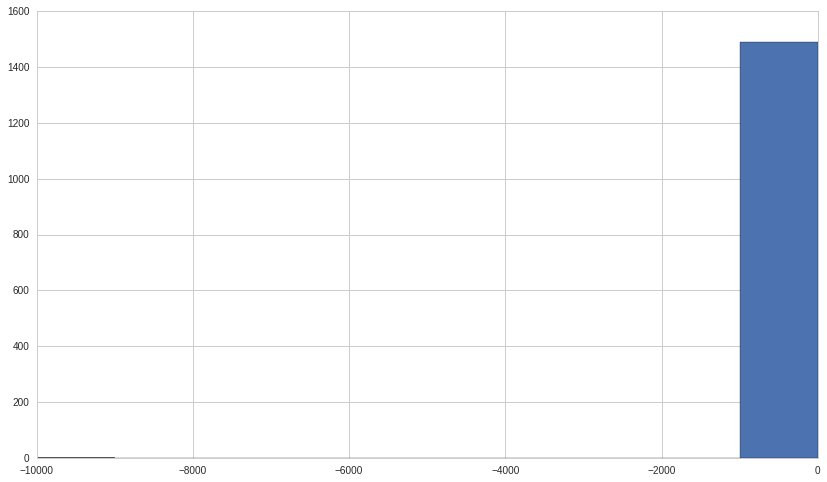

In [12]:
tmp[tmp.level_0 == '2013-12-02']['Price_to_TTM_Sales'].hist();

In [13]:
res = tmp[tmp.level_0 == '2013-12-02']['Price_to_TTM_Sales']

In [14]:
res.dropna().describe()

count     1494.000000
mean       -12.542986
std        261.535648
min     -10000.000000
25%         -4.121575
50%         -2.157050
75%         -1.148475
max         -0.067200
Name: Price_to_TTM_Sales, dtype: float64

***

In [15]:
assets = result.index.levels[1].unique()

In [16]:
pricing = get_pricing(assets, start_date='2013-12-01', end_date='2015-02-01', fields='open_price')

In [17]:
import alphalens

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated and will be removed in the future. Please use the new API instead.
  after removing the cwd from sys.path.


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-40717.430571,-7.961800,-214.187861,1673.881045,37499,10.028938
2,-9.017100,-4.798500,-6.510836,1.050355,37374,9.995507
3,-5.316300,-3.295208,-4.224873,0.435308,37379,9.996844
4,-3.802300,-2.572054,-3.172264,0.238458,37359,9.991495
5,-3.014800,-1.976577,-2.486067,0.189766,37414,10.006205
6,-2.301000,-1.591828,-1.963501,0.137621,37309,9.978123
7,-1.858000,-1.229464,-1.543889,0.122805,37349,9.988821
8,-1.425500,-0.921794,-1.178467,0.104827,37392,10.000321
9,-1.053700,-0.577593,-0.830920,0.102646,37359,9.991495


Returns Analysis


,5,10,20
Ann. alpha,-0.021,0.016,0.031
beta,-0.478,-0.690,-0.850
Mean Period Wise Return Top Quantile (bps),-1.618,-5.965,-8.668
Mean Period Wise Return Bottom Quantile (bps),-0.297,-1.072,1.434
Mean Period Wise Spread (bps),-0.095,-0.259,-0.169


/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/pl

Information Analysis


,5,10,20
IC Mean,0.007,0.007,0.003
IC Std.,0.108,0.115,0.126
t-stat(IC),1.019,0.961,0.326
p-value(IC),0.309,0.338,0.745
IC Skew,0.305,0.262,0.473
IC Kurtosis,-0.391,-0.327,-0.364
Ann. IR,1.019,0.961,0.326


/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:215: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


Turnover Analysis


,5,10,20
Quantile 1 Mean Turnover,0.033,0.055,0.096
Quantile 2 Mean Turnover,0.053,0.086,0.146
Quantile 3 Mean Turnover,0.065,0.106,0.179
Quantile 4 Mean Turnover,0.076,0.128,0.217
Quantile 5 Mean Turnover,0.082,0.137,0.234
Quantile 6 Mean Turnover,0.078,0.126,0.212
Quantile 7 Mean Turnover,0.071,0.114,0.194
Quantile 8 Mean Turnover,0.065,0.107,0.184
Quantile 9 Mean Turnover,0.047,0.080,0.139
Quantile 10 Mean Turnover,0.021,0.036,0.063


,5,10,20
Mean Factor Rank Autocorrelation,0.999,0.998,0.996


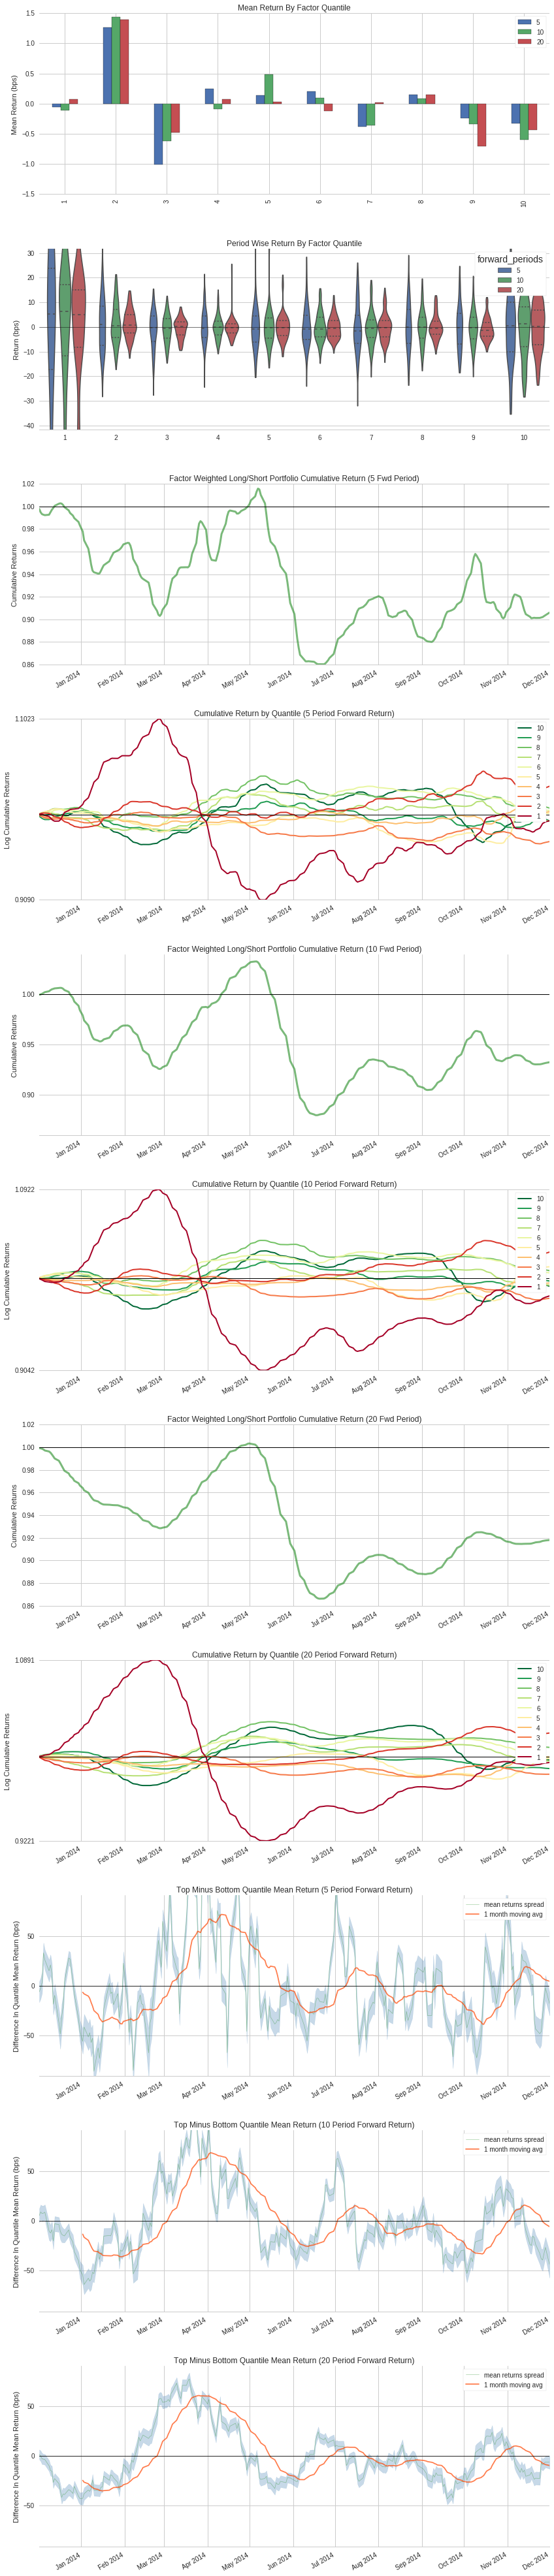

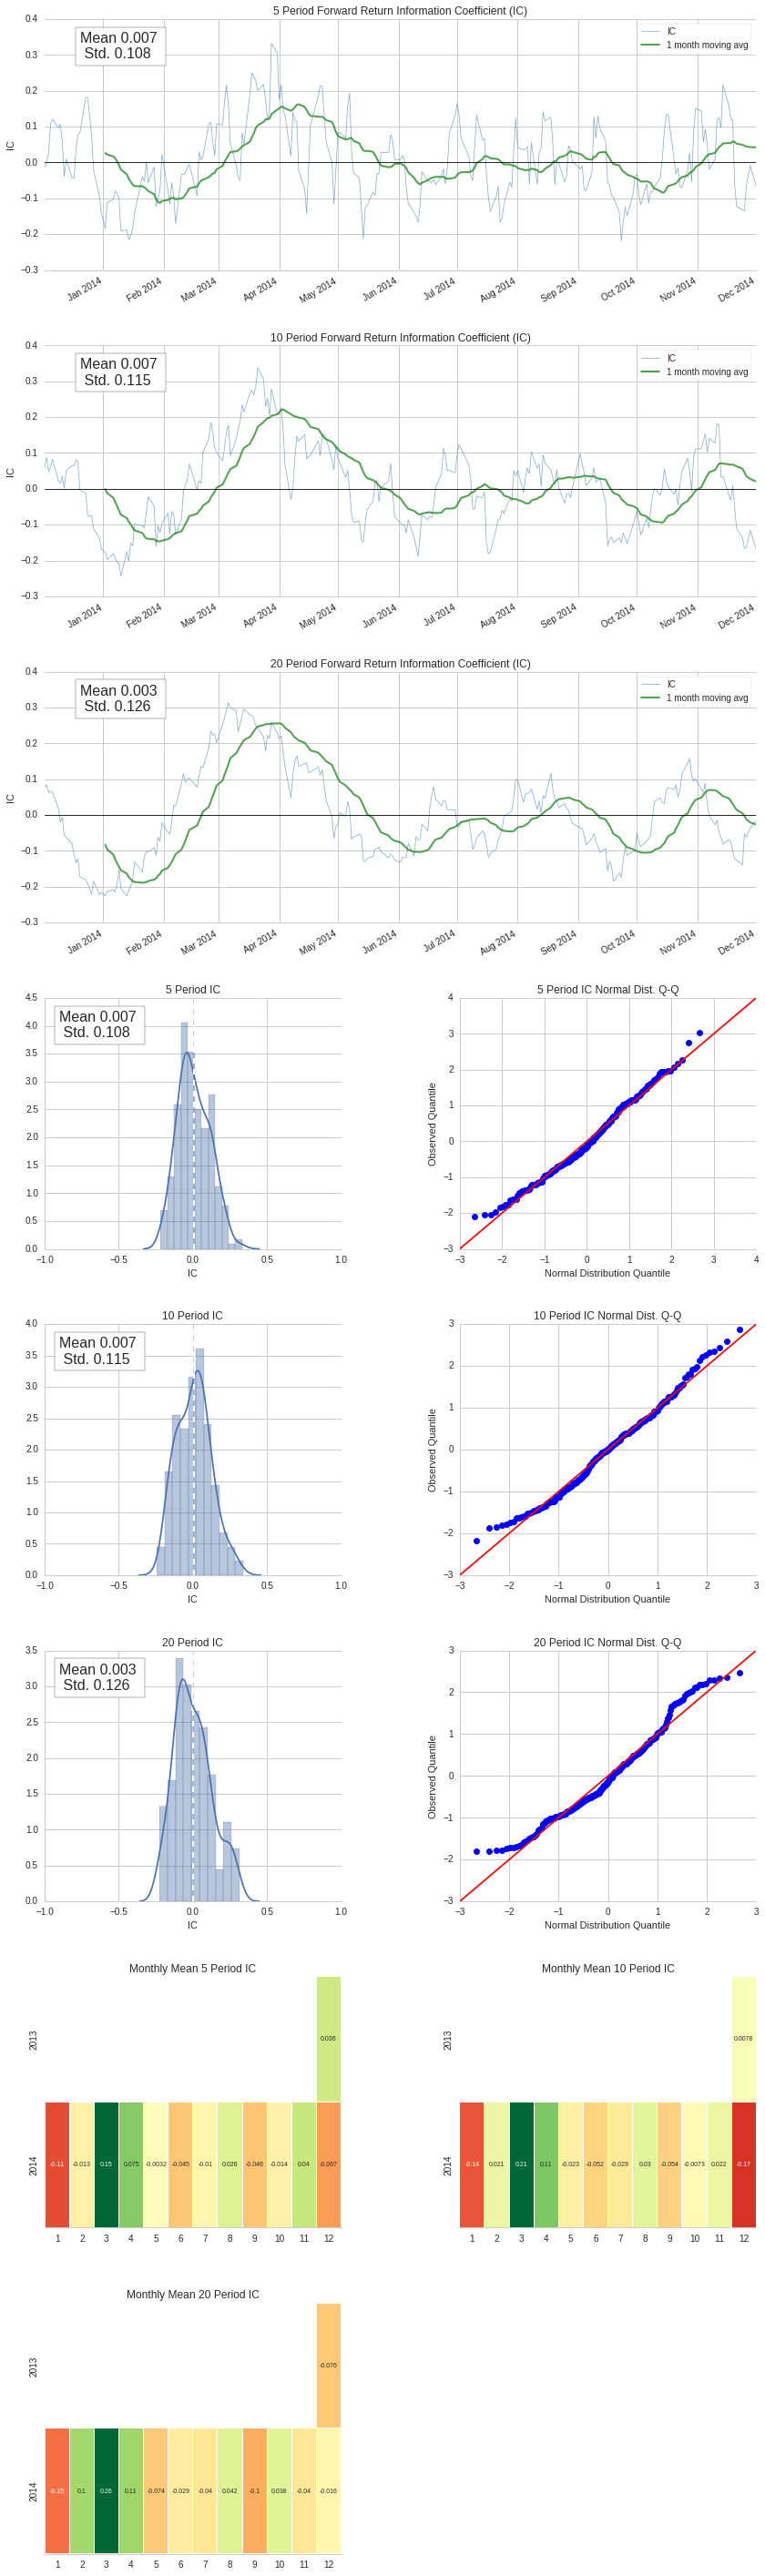

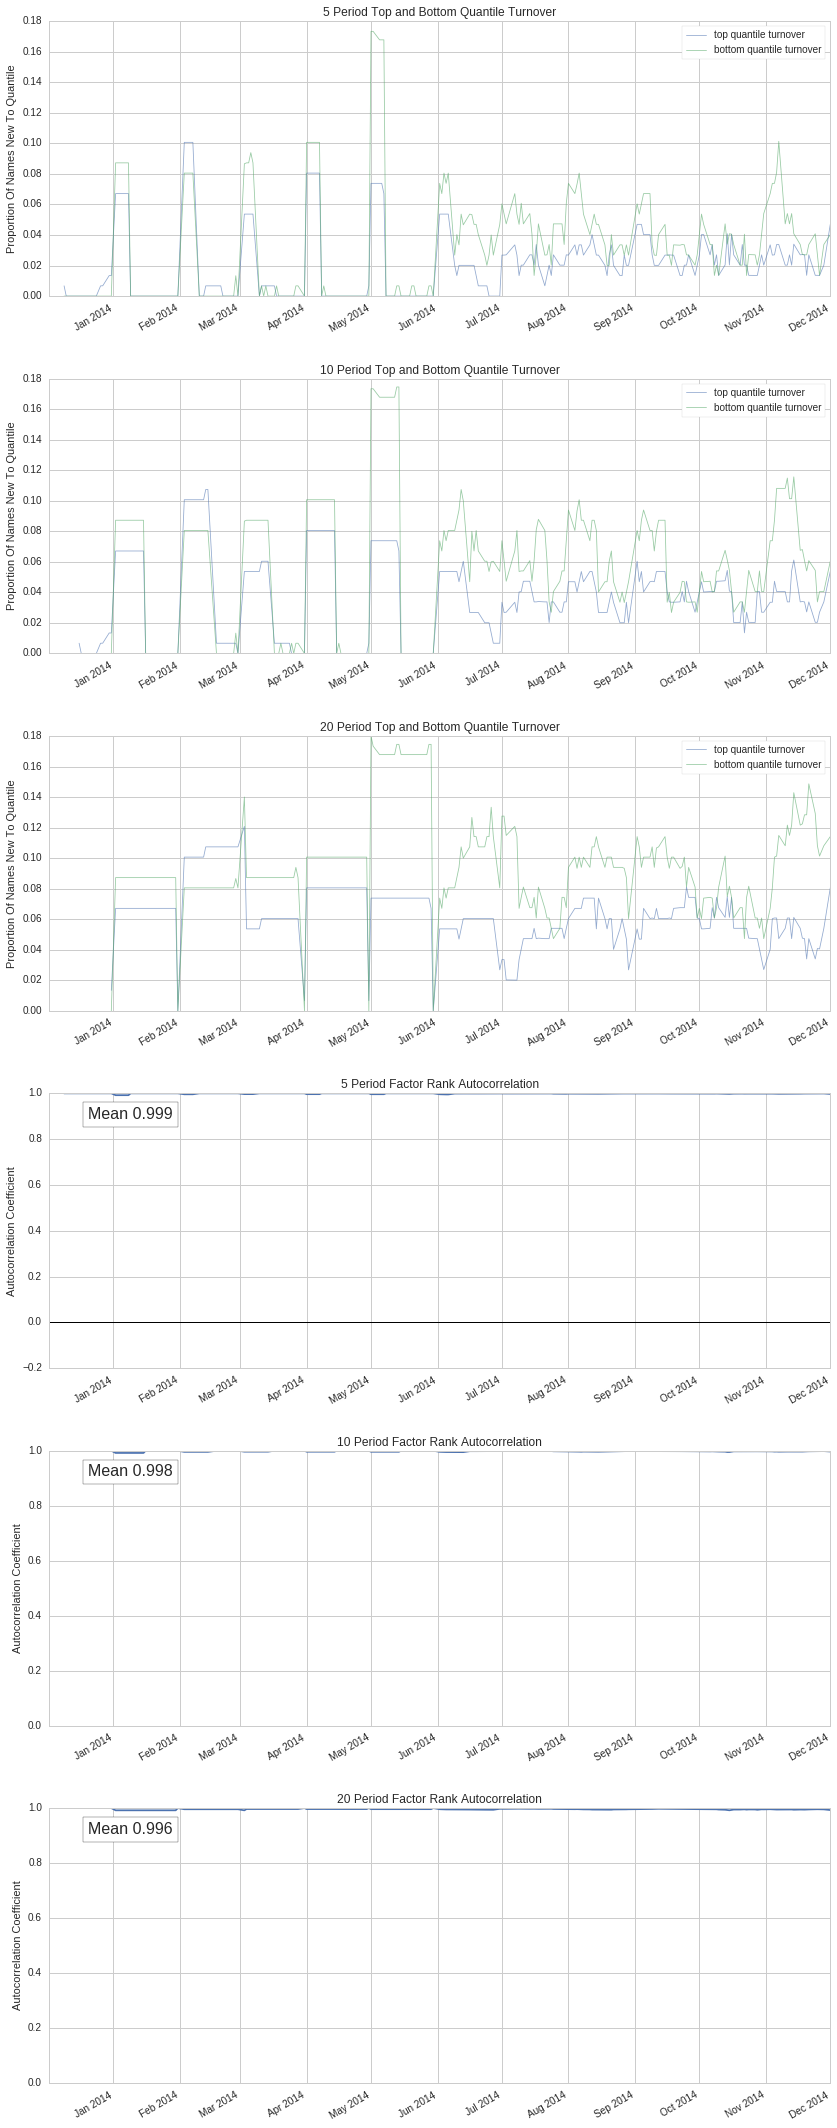

In [18]:
alphalens.tears.create_factor_tear_sheet(factor=result['Price_to_TTM_Sales'],
                                         prices=pricing,
                                         quantiles=10,
                                         periods=(5,10,20))

***